In [57]:
num_train,num_test,num_inputs=20,100,200 
from mxnet import nd 
X=nd.random.normal(shape=(num_train+num_test,num_inputs))
true_w=nd.ones((num_inputs,1))*0.1
true_b=1.3 
y=nd.dot(X,true_w)+true_b
x_train,x_test=X[:num_train],X[num_train:]
y_train,y_test=y[:num_train],y[num_train:]
x_train


[[-0.38090214 -0.50800794 -0.13969202 ...  1.6769009  -0.6372913
   0.4833494 ]
 [-0.01161444  0.9083601   1.2296662  ... -0.56653345 -0.7549326
   0.4500242 ]
 [-0.53193796  1.1954637   2.5209265  ...  0.60921013 -1.3575661
   1.01458   ]
 ...
 [-0.8327861   0.6873399  -0.8492818  ...  0.43920222 -1.3760973
   1.2114215 ]
 [-0.24433094  0.17318508 -0.4639589  ...  0.57033414 -0.58042103
   0.303161  ]
 [-1.0486788   1.3736373  -0.57060236 ... -0.03977551  0.42888406
   1.2548896 ]]
<NDArray 20x200 @cpu(0)>

In [58]:
w,b=nd.random.normal(shape=(num_inputs,1))*0.1,nd.zeros((1,))
params=[w,b]
for param in params:
    param.attach_grad()

In [59]:
batch_size=1
def data_iter(num_examples):
    import random
    idx=list(range(num_examples))
    random.shuffle(idx)
    for i in range(0,num_examples,batch_size):
        j=idx[i:min(i+batch_size,num_examples)]
        j=nd.array(j)
        yield x_train.take(j),y_train.take(j)



# 加入惩罚项，L2范数正则化

In [60]:
def net(data ,lambd,params):
    w,b=params
    return nd.dot(data,w)+b+lambd*(nd.power(w,2 ).sum()+b**2)
'''gluon版本
from mxnet import gluon
weigt_decay=3 
注意 wd 
trainer=gluon.Trainer(....,{'learning_rate':learning_rate,'wd':weigt_decay})
w = w-lr*grad-wd*w
'''
def SGD(lr,params):
    for param in params:
        param[:]=param-lr*param.grad
    
def square_loss(yhat,y):
    return (yhat-y.reshape(yhat.shape))**2 
def test(params,X,y):
    return square_loss(net(X,0,params),y).mean().asscalar()

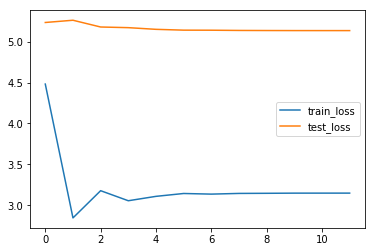

In [61]:
 
def train(lambd):
    from mxnet import autograd
    epochs=12 
    learning_rate=.002 
    train_loss,test_loss=[],[]
    for i in range(epochs):
        for data,label in data_iter(num_train):
            with autograd.record():
                yhat=net(data,lambd,params)
                loss=square_loss(yhat,label)
            loss.backward()
            SGD(learning_rate,params)
        train_loss.append(test(params,x_train,y_train))
        test_loss+=[test(params,x_test,y_test)]
    import matplotlib.pyplot as plt
    plt.plot(train_loss,label='train_loss')
    plt.plot(test_loss,label='test_loss')
    plt.legend()
    plt.show()
lambd=2 
train(lambd)
            
            

In [62]:
params[0][:5],params[1 ]

(
 [[ 0.04779986]
  [ 0.03793692]
  [ 0.0382521 ]
  [-0.08069552]
  [ 0.0542979 ]]
 <NDArray 5x1 @cpu(0)>, 
 [-0.11660931]
 <NDArray 1 @cpu(0)>)

In [73]:
import pandas as pd 
data=pd.read_excel(r'D:\test.xls',header=None )
c=data.values
c

array([[0.44053589, 2.99871197],
       [0.44334995, 2.70098774],
       [0.44241596, 2.79982313],
       ...,
       [0.44003806, 3.40890016],
       [0.44950046, 3.44082809],
       [0.44290395, 3.42093711]])

In [80]:
from mxnet import nd 
nd.array(c )


[[0.4405359  2.998712  ]
 [0.44334996 2.7009878 ]
 [0.44241595 2.799823  ]
 ...
 [0.44003806 3.4089003 ]
 [0.44950047 3.440828  ]
 [0.44290394 3.420937  ]]
<NDArray 800x2 @cpu(0)>